NetID: craiglo2

Assignment: Lab 3

Grade: 8.5 / 12

FYI audio with more sharp attacks (e.g. drum loop) to simulate plain impulses are easier to analyze for reverb, delay, etc.:)

- Part 1: (2.5/3)
  - c. Missing frequecy response:(
- Part 2: (3/3)
- Part 3: (3/3)
- Part 4: (0/3)

# CS448 - Lab 3: Artificial Reverberation and Room Simulation


In this lab we will get some experience in simulating rooms digitally. We will design some simple reverbs using small filters and then work towards a more principled room simulator. You can use whichever sound you like for the following examples, usually a sound with sharp onsets is good for such experiments. One good example is the drum loop [ https://drive.google.com/uc?export=download&id=16mqI3xFN00AK5bP5k1VYJiEfH7ghHHSf ]

## Part 1. Designing simple reverb using filters

The simplest forms of reverbs can be designed using simple delays, comb and allpass filters. We will design one of each to get started.

a) A room with a single wall. For this reverb we will assume that we have a room that only has one reflective wall as shown below. Design a filter that simulates what the microphone will record. Figure out the right filter in the case where $d_i = [0.2, 1]$ meters, and in the case where $d_i = [2, 10]$ meters. Let me know what the differences between these sounds are. To keep things simple, round the delays to an integer number and make up an approximate gain loss due to propagation and the wall bounce.

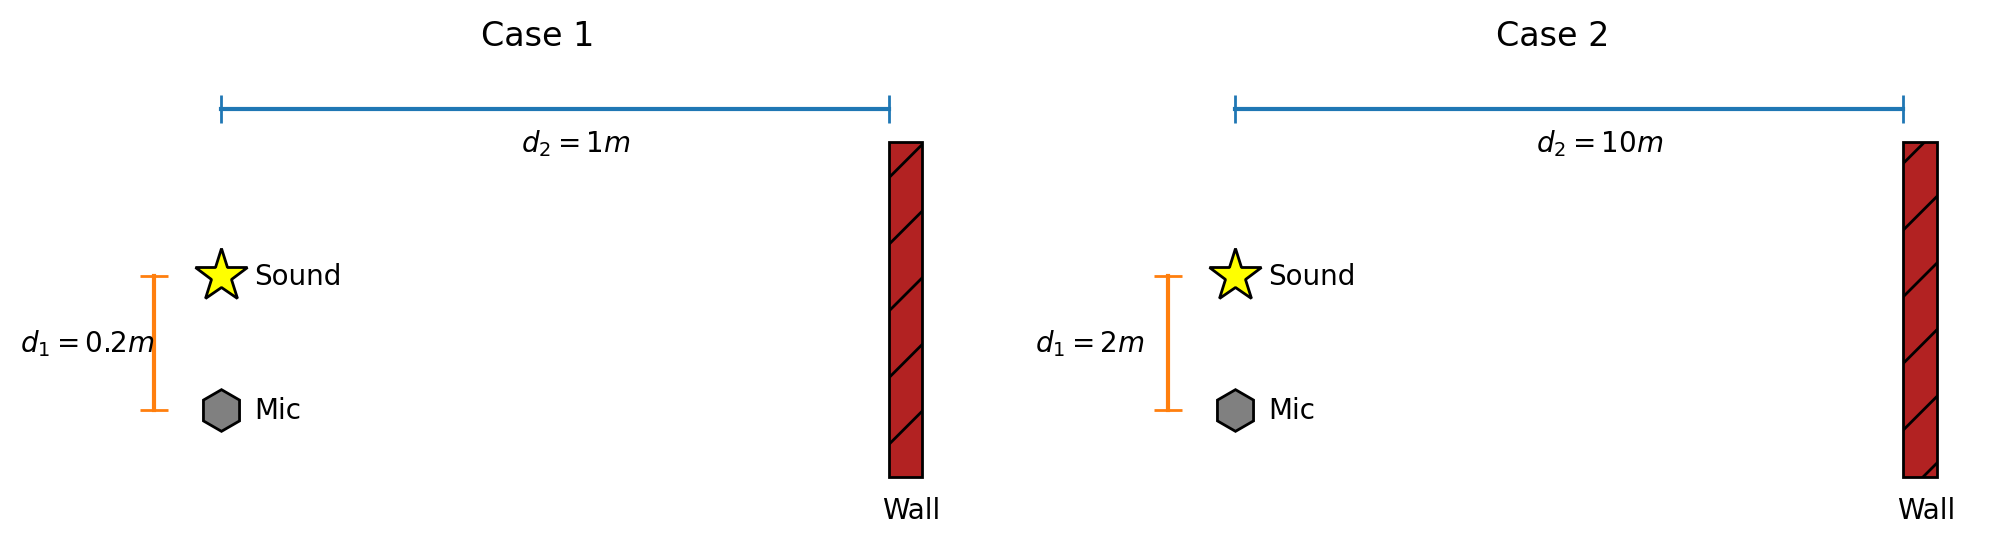

In [3]:
from matplotlib.pylab import gca, gcf, figure
from matplotlib.patches import Rectangle
%config InlineBackend.figure_format = 'retina'

figure( figsize=(12,3), facecolor='w')
gcf().add_subplot( 1, 2, 1, title='Case 1', frameon=False, xticks=[], yticks=[])
gca().plot( 0, 0, 'h', color='grey', markeredgecolor='k', markersize=15)
gca().plot( 0, .2, '*', color='yellow', markeredgecolor='k', markersize=20)
gca().plot( [0,1], [.45,.45], marker='|', markersize=10)
gca().plot( [-.1,-.1], [0,.2], marker='_', markersize=10)
gca().add_patch( Rectangle( (1,-.1), .05, .5, facecolor='firebrick', edgecolor='k', hatch='/'))
[gca().text(x+.05,y,t,va='center',ha='left') 
    for x,y,t in zip( [0,0,-.35,.4,.94], [0,.2,.1,.4,-.15], ['Mic','Sound','$d_1=0.2m$', '$d_2=1m$', 'Wall'])]
gca().axis( 'equal')

gcf().add_subplot( 1, 2, 2, title='Case 2', frameon=False, xticks=[], yticks=[])
gca().plot( 0, 0, 'h', color='grey', markeredgecolor='k', markersize=15)
gca().plot( 0, .2, '*', color='yellow', markeredgecolor='k', markersize=20)
gca().plot( [0,1], [.45,.45], marker='|', markersize=10)
gca().plot( [-.1,-.1], [0,.2], marker='_', markersize=10)
gca().add_patch( Rectangle( (1,-.1), .05, .5, facecolor='firebrick', edgecolor='k', hatch='/'))
[gca().text(x+.05,y,t,va='center',ha='left') 
    for x,y,t in zip( [0,0,-.35,.4,.94], [0,.2,.1,.4,-.15], ['Mic','Sound','$d_1=2m$', '$d_2=10m$', 'Wall'])]
gca().axis( 'equal');

In [4]:
import numpy as np
from scipy.io import wavfile

def sound( x, rate=8000, label=''):
    from IPython.display import display, Audio, HTML
    display( HTML( 
    '<style> table, th, td {border: 0px; }</style> <table><tr><td>' + label + 
    '</td><td>' + Audio( x, rate=rate)._repr_html_()[3:] + '</td></tr></table>'
    ))


def reverb( audio, sample_rate, d1, d2):
    output = np.zeros( len(audio))
    delay = int((d1 + d2*2) * sample_rate / 343)
    
    for n in range(delay, len(audio)):
        output[n] = audio[n] + 0.5 *  audio[n - delay]
    
    return output

sample_rate, audio = wavfile.read( 'speech.wav')
audio = audio / 2**15

reverbed_1 = reverb( audio, sample_rate, .2, 1)
reverbed_2 = reverb( audio, sample_rate, 2, 10)


sound( audio, sample_rate, 'original')
sound( reverbed_1, sample_rate, 'reverbed_1')
sound( reverbed_2, sample_rate, 'reverbed_2')

original


reverbed_1


reverbed_2


The difference between these is ... With the first reverb, the delay is barely noticable with the small distance. The second reverb sounds like the sound is playing twice and is very distinct.

b) Now we will use a room geometry as shown below. Design the proper filter again, for $d = 1$ meters and then for $d = 10$ meters. Comment on the audible differences between these two settings.

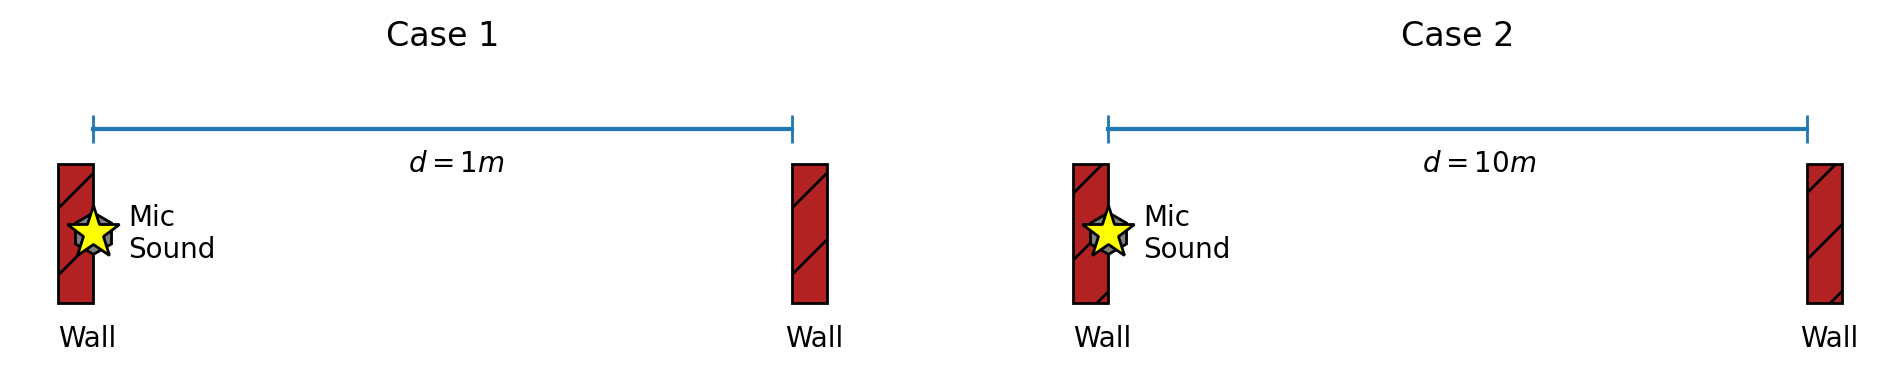

In [5]:
figure( figsize=(12,2), facecolor='w')
gcf().add_subplot( 1, 2, 1, title='Case 1', frameon=False, xticks=[], yticks=[])
gca().plot( 0, 0, 'h', color='grey', markeredgecolor='k', markersize=15)
gca().plot( 0, 0, '*', color='yellow', markeredgecolor='k', markersize=20)
gca().plot( [0,1], [.15,.15], marker='|', markersize=10)
gca().add_patch( Rectangle( (1,-.1), .05, .2, facecolor='firebrick', edgecolor='k', hatch='/'))
gca().add_patch( Rectangle( (0,-.1), -.05, .2, facecolor='firebrick', edgecolor='k', hatch='/'))
[gca().text(x+.05,y,t,va='center',ha='left') 
    for x,y,t in zip( [0,.4,.94,-.1], [0,.1,-.15,-.15], ['Mic\nSound','$d=1m$','Wall','Wall'])]
gca().axis( 'equal')

gcf().add_subplot( 1, 2, 2, title='Case 2', frameon=False, xticks=[], yticks=[])
gca().plot( 0, 0, 'h', color='grey', markeredgecolor='k', markersize=15)
gca().plot( 0, 0, '*', color='yellow', markeredgecolor='k', markersize=20)
gca().plot( [0,1], [.15,.15], marker='|', markersize=10)
gca().add_patch( Rectangle( (1,-.1), .05, .2, facecolor='firebrick', edgecolor='k', hatch='/'))
gca().add_patch( Rectangle( (0,-.1), -.05, .2, facecolor='firebrick', edgecolor='k', hatch='/'))
[gca().text(x+.05,y,t,va='center',ha='left') 
    for x,y,t in zip( [0,.4,.94,-.1], [0,.1,-.15,-.15], ['Mic\nSound','$d=10m$','Wall','Wall'])]
gca().axis( 'equal');

In [6]:
def comb( audio, sample_rate, d):
    output = np.zeros( len(audio))
    delay = int(2 * d * sample_rate / 343)
    
    for n in range(delay, len(audio)):
        output[n] = audio[n] + 0.5 *  output[n - delay]
    
    return output

reverbed_3 = comb( audio, sample_rate, 1)
reverbed_4 = comb( audio, sample_rate, 10)


sound( audio, sample_rate, 'original')
sound( reverbed_3, sample_rate, 'reverbed_3')
sound( reverbed_4, sample_rate, 'reverbed_4')

original


reverbed_3


reverbed_4


What's different now is ... Pretty much the same thing as before, where the first delay is barely noticable and the second is much more significant except the delays are repeating.

c) Since for small values of $d$ the output above gets its spectrum altered, we will use an allpass filter to make a more natural sounding echo pattern. Use the formulation shown in the lecture slides and compare that filter’s frequency response with the response from the filter in the section b) above.  How does the allpass filter sound when compared to the ones above?

In [7]:
def allpass(audio, sample_rate, d):
    output = np.zeros( len(audio))
    delay = int(2 * d * sample_rate / 343)
    
    for n in range(delay, len(audio)):
        output[n] = 0.5 * audio[n] + audio[n - delay] - 0.5 * output[n - delay]
    
    return output

reverbed_5 = allpass( audio, sample_rate, 10)
sound( reverbed_5, sample_rate, 'reverbed_5')



reverbed_5


This filter sounds ... Much more spacey. It sounds like it's in a room with the audio bouncing around. It is a combination of the comb and reverb filter.

## Part 2. Schroeder reverberators

Now we will combine multiple filters to make a more serious sounding reverb. Implement the structure shown in slide 24 of the reverb lecture (the page is titled "*Wetness of reverb*").

Try to find the necessary parameters for the above structure that makes it sound as good as possible (not too busy, not too subtle). Hint: There is no right answer! Try a few things, see what sounds best and explain why you used the parameters you decided to use. As you come across some bad sounding cases, describe what the problem was.

In [8]:
def schroeder(audio, sample_rate, d):
    combs = comb( audio, sample_rate, 5)
    combs = comb( audio, sample_rate, 3)
    combs = comb( audio, sample_rate, 10)

    output = 5 * audio

    allpasses = allpass(combs, sample_rate, 10)
    allpasses = allpass(allpasses, sample_rate, 5)
    
    output += allpasses
    return output

reverbed_6 = schroeder( audio, sample_rate, 10)
sound( reverbed_6, sample_rate, 'reverbed_6')

reverbed_6


Here's what worked and what didn't for me ... What worked for me was turning up the "dryness level" aka. what I multiply the output by. It sounds much more like a fading out reverb rather than a bunch of higher pitched repeating echoes. What did not work was going crazy with the allpass and comb filters on either end of the spectrum. Too much would be too significant and and too little would be the reverb impossible to hear.

## Part 3. Applying a real room response

To apply a more realistic filter we need to use a real room response. Download the St. Andrew’s church room impulse response (Stereo) from:

[ https://openairlib.net/?page_id=683 ]
    
Make sure that the sound you will convolve with it will be at the same sampling rate. This impulse response captures that church’s RIR using two channels. To synthesize a sound in that room you need to convolve it with the impulse response. If your test sound is a single-channel recording, you can simply convolve it with each of the two impulse responses and then use the resulting outputs as the left and right channel. You will notice that using the ```scipy.signal.lfilter``` command for this operation can take very long to compute. For faster convolutions we need to perform this filtering in the frequency domain (using the fast convolution algorithm that we mentioned in the filtering lecture). The function ```numpy.convolve``` automatically does that (if you use an up to date version), otherwise you can directly use ```scipy.signal.fftconvolve```.  Verify that the resulting output sounds like it has been placed inside a church.


In [10]:
import scipy.signal as signal

sample_rate_rir, rir = wavfile.read( 'lyd3_000_ortf_48k.wav')
left = signal.fftconvolve(audio, rir[:, 0], mode='full')
right = signal.fftconvolve(audio, rir[:, 1], mode='full')

church = np.stack((left, right))
church = church[:, :len(audio)]

sound( church, sample_rate, 'reverbed_6')

reverbed_6


## Part 4 (for 4-hour credit students). Measuring a room response.

Measuring a room response is crucial when trying to emulate a real room. In this exercise we will make a simple room response measurement. We will use a technique similar to the one shown in the lecture slides.

a) Generate a chirp to use as our room excitation signal $x[t]$.  It should go from 0 to Nyquist in about a third of a second.  Zero pad it from the front and the back to make it be about 2 seconds long.

b) Go to a (preferably quiet) room that you want to measure, play the chirp from a speaker and record the outcome.  The easiest way to do that is to save this sequence as a wave file and play it while you record a new sound file, or for better results you can instead use the real-time I/O code from Lab 0 to play and record the sound simultaneously. Either way you will obtain the sequence $y[t]$ from slide 34.

c) Now you will need to perform the actual deconvolution. Take $x[t]$ and $y[t]$, compute their DFTs to get $X[ω]$ and $Y[ω]$, and estimate $H[ω]$ as shown in slide 36. If you recorded the audio manually you will need to trim the recording to be the same size as the input.  Take the inverse DFT of $H$ to get the time domain representation of the room impulse response. Plot it; does it look like a legit room response?

d) Convolve the resulting response with the test sound above (make sure you use the same sample rates). Does it sound reverberated? This won’t be perfect. What sounds “wrong” with it? Can you speculate why?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

The estimated response looks like ... *[fill in here]*

The sound sounds wrong because ... *[fill in here]*